In [4]:
import yfinance as yf
import pandas as pd
import numpy as np

In [33]:
ativos = ['WEGE3.SA','ITSA4.SA','CASH3.SA','BTC-USD','USDBRL=X']

In [34]:
inicio = '2020-12-28'
fim = '2021-10-07'

In [35]:
precos = pd.DataFrame()

In [36]:
for i in ativos:
    precos[i] = yf.download(i,start=inicio,end=fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [37]:
precos['BTC-BRL'] = precos['BTC-USD']*precos['USDBRL=X']

In [38]:
precos = precos.drop(columns=['BTC-USD','USDBRL=X'])

In [39]:
normalizado = precos/precos.iloc[0]

<AxesSubplot:xlabel='Date'>

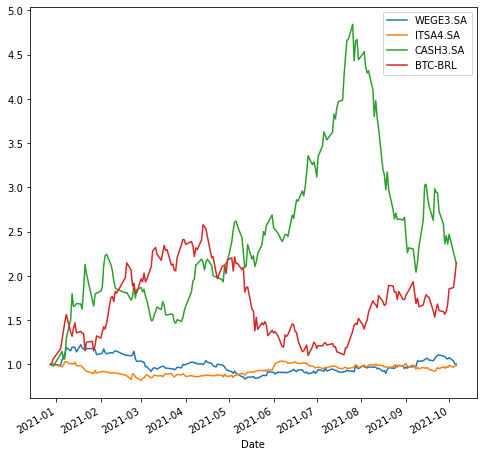

In [40]:
normalizado.plot(figsize = (8,8))

In [42]:
compras = {'WEGE3.SA':50,'ITSA4.SA':50,'CASH3.SA':50,'BTC-BRL':50}

In [43]:
compras_df = pd.Series(data=compras, index=list(compras.keys()))

In [44]:
sum(compras.values())

200

In [45]:
primeiro = precos.iloc[0]

In [46]:
qtd_acoes = compras_df/primeiro

In [47]:
PL = precos*qtd_acoes

In [48]:
PL.head()

,WEGE3.SA,ITSA4.SA,CASH3.SA,BTC-BRL
Date,,,,
2020-12-28,50.000000,50.000000,50.000000,50.000000
2020-12-29,49.768216,50.296611,49.738545,50.808893
2020-12-30,50.158937,49.703393,49.052277,53.173537
2021-01-04,49.417220,48.940684,55.751626,58.757034
2021-01-05,52.450325,48.559333,57.222217,63.714416


In [49]:
PL['PL TOTAL'] = PL.iloc[:].sum(axis = 1)

In [50]:
PL.head()

,WEGE3.SA,ITSA4.SA,CASH3.SA,BTC-BRL,PL TOTAL
Date,,,,,
2020-12-28,50.000000,50.000000,50.000000,50.000000,200.000000
2020-12-29,49.768216,50.296611,49.738545,50.808893,200.612266
2020-12-30,50.158937,49.703393,49.052277,53.173537,202.088144
2021-01-04,49.417220,48.940684,55.751626,58.757034,212.866564
2021-01-05,52.450325,48.559333,57.222217,63.714416,221.946291


In [51]:
ibov = yf.download('^BVSP',start=inicio,end=fim)

[*********************100%***********************]  1 of 1 completed


In [52]:
ibov.rename(columns={'Adj Close':'IBOV'}, inplace = True)

In [53]:
ibov = ibov.drop(ibov.columns[[0,1,2,3,5]], axis=1)

In [54]:
ibov.index = pd.to_datetime(ibov.index)

In [55]:
PL.index = pd.to_datetime(PL.index)

In [56]:
novo_df = pd.merge(ibov,PL,how='inner',on='Date')

In [57]:
PL.head()

,WEGE3.SA,ITSA4.SA,CASH3.SA,BTC-BRL,PL TOTAL
Date,,,,,
2020-12-28,50.000000,50.000000,50.000000,50.000000,200.000000
2020-12-29,49.768216,50.296611,49.738545,50.808893,200.612266
2020-12-30,50.158937,49.703393,49.052277,53.173537,202.088144
2021-01-04,49.417220,48.940684,55.751626,58.757034,212.866564
2021-01-05,52.450325,48.559333,57.222217,63.714416,221.946291


In [58]:
PL_normalizado = novo_df/novo_df.iloc[0]

In [59]:
PL_normalizado.head()

,IBOV,WEGE3.SA,ITSA4.SA,CASH3.SA,BTC-BRL,PL TOTAL
Date,,,,,,
2020-12-28,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-12-29,1.003561,0.995364,1.005932,0.994771,1.016178,1.003061
2020-12-30,1.002142,1.003179,0.994068,0.981046,1.063471,1.010441
2021-01-04,0.995859,0.988344,0.978814,1.115033,1.175141,1.064333
2021-01-05,1.001445,1.049006,0.971187,1.144444,1.274288,1.109731


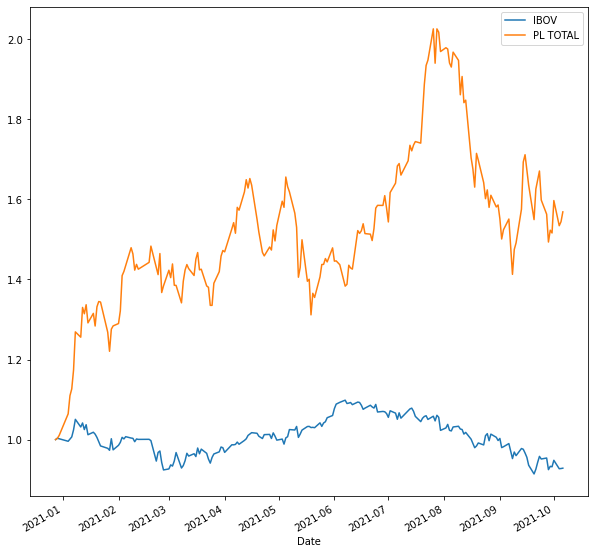

In [60]:
PL_normalizado[['IBOV','PL TOTAL']].plot(figsize=(10,10));